In [1]:
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px


init_notebook_mode(connected=True)



import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
# Функция округления
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

**1.Загрузить файл hr.csv.**
==================

In [3]:
hr = pd.read_csv('HR.csv')
hr['count_people'] = 1

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,count_people
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**
==================

In [5]:
colums = [c for c in hr]

for i in colums:
    try:
        print('')
        print(i)
        clear = hr[i]
        value = {}

        value['Mediana'] = statistics.median(clear)

        try:
            value['Mode'] = statistics.mode(clear)
        except:
            value['Mode'] = 'Отсутствует'

        value['Mean'] = statistics.mean(clear)

        value['pstdev'] = statistics.pstdev(clear)

        value['pvariance'] = statistics.pvariance(clear)

        value['max'] = clear.max()
        value['min'] = clear.min()

        value['max-min'] = clear.max() - clear.min()

        for res in value.items():
            print(f'{res[0]} : {res[1]}')
    except:
        print('Не числовой формат данных')



satisfaction_level
Mediana : 0.64
Mode : 0.1
Mean : 0.6128335222348157
pstdev : 0.2486223626820733
pvariance : 0.061813079225616394
max : 1.0
min : 0.09
max-min : 0.91

last_evaluation
Mediana : 0.72
Mode : 0.55
Mean : 0.7161017401160077
pstdev : 0.1711634045107436
pvariance : 0.029296911043708445
max : 1.0
min : 0.36
max-min : 0.64

number_project
Mediana : 4
Mode : 4
Mean : 3.80305353690246
pstdev : 1.2325512654823438
pvariance : 1.5191826220421274
max : 7
min : 2
max-min : 5

average_montly_hours
Mediana : 200
Mode : Отсутствует
Mean : 201.0503366891126
pstdev : 49.94143446256218
pvariance : 2494.146876178393
max : 310
min : 96
max-min : 214

time_spend_company
Mediana : 3
Mode : 3
Mean : 3.498233215547703
pstdev : 1.4600875552715114
pvariance : 2.1318556690587385
max : 10
min : 2
max-min : 8

Work_accident
Mediana : 0
Mode : 0
Mean : 0.1446096406427095
pstdev : 0.3517068274513532
pvariance : 0.12369769247589593
max : 1
min : 0
max-min : 1

left
Mediana : 0
Mode : 0
Mean : 0.238082

**3.Рассчитать и визуализировать корреляционную матрицу для переменных.**
==================

In [6]:
hr_matrix = hr.drop(['number_project','sales','salary', 'count_people'],axis='columns')
hr_matrix_sns = hr_matrix.corr().round(2)
hr_matrix_sns

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.34,0.13,-0.01,0.01,-0.01
average_montly_hours,-0.02,0.34,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.00,0.07,0.04,-0.06,1.00


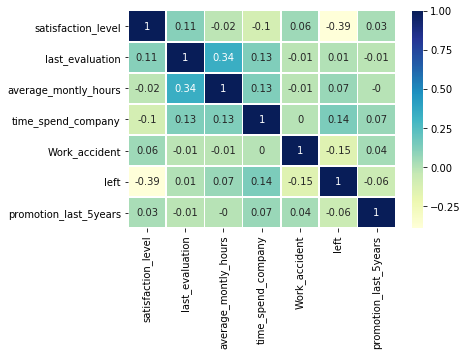

In [7]:
sns.heatmap(hr_matrix_sns, annot=True,linewidths=0.5, cmap="YlGnBu")


Вывод: 
========
Мы можем увидеть корреляцию между уходом сотрудника и уровнем удовлетворенности. Это значит что недовольные сотрудники уходят намного чаще.

Еще можно заметить что сотрудники, которые работают больше по количеству часов, лучше проходят аттестацию.

**4.Визуализировать несколько взаимосвязей между переменными.**
==================

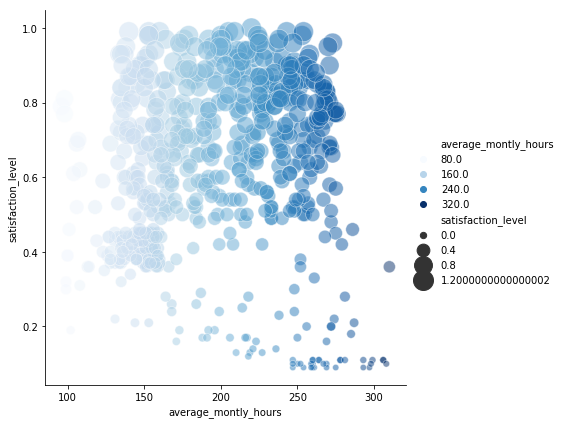

In [162]:
sns.relplot(x="average_montly_hours", y="satisfaction_level", hue=hr.average_montly_hours.sample(3000), 
            size=hr.satisfaction_level.sample(3000),
            sizes=(40, 400), alpha=.5, palette="Blues",
            height=6, data=hr)

Вывод
===
На графике мы наглядно видим, два набора сотрудников, которые работают чуть меньше среднего по количеству часов и их уровень удовлетворенности меньше половины. Вторая группа сотрудников, работают больше среднего количенства часов, и их удовлетворенность находится на высоком уровне.

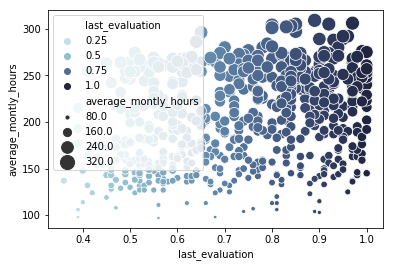

In [152]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="last_evaluation", y="average_montly_hours",
                     hue=hr.last_evaluation.sample(3000), size=hr.average_montly_hours.sample(3000),
                     palette=cmap, sizes=(10, 200),
                     data=hr)

Вывод
===
На графике мы видим, что большая часть сотрудников успешно прошедшую аттестацию, работают больше часов. Можно так же выделить две группы, те кто успешно прошел аттестацию и работают меньше часов и те кто прошел успешно и работают больше часов.

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**
==================

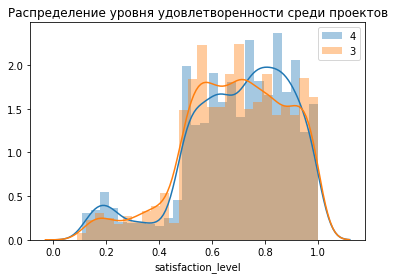

t-критерий: 1.725
p-value:0.085


In [41]:
data_tuple = (4,3,'satisfaction_level')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')


Вывод: 
========
У нас p-value больше 0.05, t критерий отличен от 0

Можно сказать что уровень удовлетворенности проекта 3 почти аналогичен уровндю удовлетворенности проекта 4

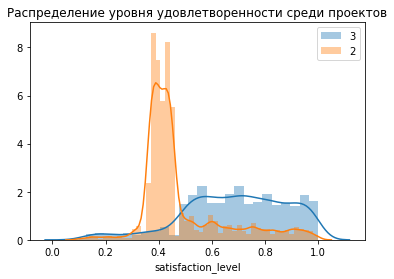

t-критерий: 44.367
p-value:0.000


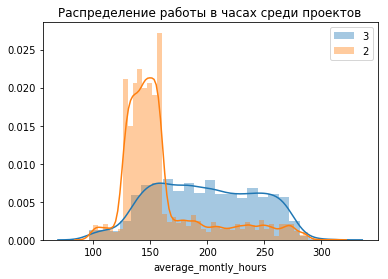

t-критерий: 33.848
p-value:0.000


In [163]:
data_tuple = (3,2,'satisfaction_level')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')




data_tuple = (3,2,'average_montly_hours')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение работы в часах среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

Вывод: 
========
У нас p-value равно 0, t критерий значительно отличен от 0 

Можно сказать что уровень удовлетворенности проекта 2 намного ниже, чем у проекта 3. А благодаря второму графику мы можем понять одну из причин, в данном случае недоработка в проекте, возможно сотрудникам не нравится проект, поэтому они меньше времени траться на него.

**6.Рассчитать сколько работников работает в каждом департаменте.**
==================

In [14]:
people_department = hr.filter(items=['sales','count_people']).groupby('sales').count()
people_department

,count_people
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [15]:
trace0 = go.Bar(
    x=people_department.index,
    y=people_department.count_people,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of department people'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Вывод
===
Большее количество сотрудников работает в отеделе Sales и Technical.

**7.Показать распределение сотрудников по зарплатам.**
==================

In [16]:
people_salary = hr.filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary

,count_people
salary,
high,1237
low,7316
medium,6446


In [17]:
trace0 = go.Bar(
    x=people_salary.index,
    y=people_salary.count_people,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of salary'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Вывод
===
Количество сотрудников с высокой зарплатой самая маленькая.
Большая часть сотрудников получает низкую и среднюю зарплату.

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**
==================

In [18]:
people_salary_department = hr.filter(items=['sales','salary','count_people']).groupby(by = ['salary','sales']).count()
people_salary_department


people_salary_department_pivot = people_salary_department.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='count_people', 
                        aggfunc=sum).fillna(0).applymap(float)
people_salary_department_pivot


salary,high,low,medium
sales,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


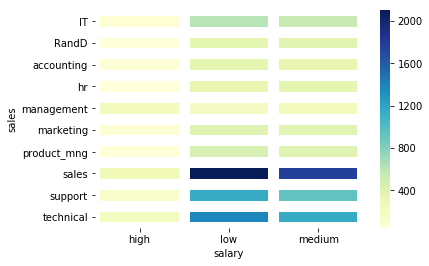

In [19]:
sns.heatmap(people_salary_department_pivot, linewidths=10, cmap="YlGnBu")

In [20]:
people_salary_department_iplotly = people_salary_department.reset_index()
fig = px.bar(people_salary_department_iplotly, x="sales", y="count_people", color='salary')
fig.show()


Вывод
===
Мы видим что во многих отделах распределение зарплаты нормальное, но выделяется отдел Management, где высокая зарпалата у большего количества сотрудников этого отдела. Можно предположить что там находятся руководящие позиции. 

**9.Сколько сотрудников покинули компанию.**
==================

In [155]:
left = sum(hr.left)
count_people = sum(hr.count_people)
print(str(left) + " сотрудников покинуло компанию.")
print(str(count_people) + ' сотрудников в компании.')
percent_left = left/count_people*100
print(str( toFixed(percent_left,2)) + ' процентов сотрудников покинуло компанию.')

3571 сотрудников покинуло компанию.
14999 сотрудников в компании.
23.81 процентов сотрудников покинуло компанию.


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**
==================

**Первая гипотеза: сотрудники покидают компанию из за низкой зарплаты**

In [156]:
# Таблица сотрудников с разбивкой по уровню зарплаты
people_salary = hr.filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary.rename(columns={'salary': 'salary', 'count_people': 'count_peaople_salary'}, inplace=True)
people_salary

,count_peaople_salary
salary,
high,1237
low,7316
medium,6446


In [157]:
# Таблица покинувших компанию сотрудников с разбивкой по уровню зарплаты
people_salary_left = hr.where(hr.left==1).filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary_left.rename(columns={'salary': 'salary', 'count_people': 'count_peaople_salary_left'}, inplace=True)
people_salary_left

,count_peaople_salary_left
salary,
high,82
low,2172
medium,1317


In [158]:
joined = people_salary.merge(people_salary_left, how='inner', on='salary')

In [159]:
# Считаем процент сотрудников покинувших компанию
percent_left_salary = joined['count_peaople_salary_left']/joined['count_peaople_salary']*100

round(percent_left_salary,2)

salary
high       6.63
low       29.69
medium    20.43
dtype: float64

**Вывод:** Как мы видим почти 30% и 20% сотрудников с низким и средним доходом покиают компанию.

**Вторая гипотеза: сотрудники покидают компанию из за низкого уровня удовлетворенности**

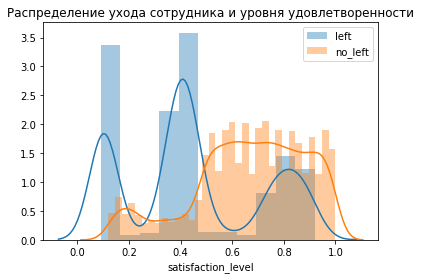

t-критерий: -51.613
p-value:0.000


In [160]:
data_tuple = ('left','no_left','satisfaction_level')
hr1 = hr.loc[hr['left']==1][data_tuple[2]]
hr2 = hr.loc[hr['left']==0][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение ухода сотрудника и уровня удовлетворенности')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()
value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

**Вывод:** Мы видим что уровень удовлетворенности среди тех кто ушел и тех кто остался существенно отличается, а вероятность что они не связаны равна 0 (p-value). 
Можно сделать вывод что низкий уровень удовлетворенности, влияет на уход сотрудника из компании. Можно сказать что гипотеза **Подтверждена**

**Третья гипотеза: сотрудники покидают компанию из за переработки по количествам часов**

За месяц должно получаться примерно 160 рабочих часов,поэтому мы определим связь между переработкой и уходом из компании.
Так же имеет смысл проверить на каких проектах происходит переработка по количеству рабочих часов number_project

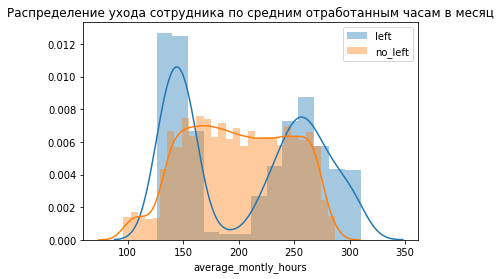

t-критерий: 8.752
p-value:0.000


In [161]:
data_tuple = ('left','no_left','average_montly_hours')
hr1 = hr.loc[hr['left']==1][data_tuple[2]]
hr2 = hr.loc[hr['left']==0][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение ухода сотрудника по средним отработанным часам в месяц')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()
value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

**Вывод:** Мы видим что сотрудники уходят как из за переработок, так и из за недоработок (имеется ввиду предположение, что работать им не хочется в данной компании, поэтому работают меньше 40 часов в неделю), а вероятность что эти показатели не связаны равна 0 (p-value). Можно сказать что гипотеза частично **Подтверждена** (потому что причина ухода может быть как и в переработке, так и в том что сотрудник не заинтересован в работе или не загружен на ней(не вовлечен))